In [1]:
# Алексеев Д.П. (DSU-4,FEML-8)
# Домашнее задание к лекции «Оценка точности модели, переобучение, регуляризация» (#4).

# Задание:
# Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
# Построить график Precision - Recall на этих же данных.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('E:\\Netology\\Machine Learning\\Practice\\affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# Формируем набор признаков
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [7]:
# Формируем целевую переменную
Y = data['affair']
Y.head(2)

0    1
1    1
Name: affair, dtype: int64

In [8]:
# создаем модель логистической регрессии
model = LogisticRegression()

In [9]:
# Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
# Обучаем модель
model.fit(X_train, Y_train)

LogisticRegression()

In [11]:
# Получаем прогнозные значения модели на тестовой выборке и записываем их в переменную 'predictions'
predictions = model.predict_proba(X_test)
predictions[:2]

array([[0.37442486, 0.62557514],
       [0.92523133, 0.07476867]])

In [12]:
model.score(X_train, Y_train)

0.7235188509874326

In [13]:
model.score(X_test, Y_test)

0.7319371727748691

In [14]:
# для расчета tpr и fpr найдем значения составляющих, порог для predicted_prob возьмем равным 0.5:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [15]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [16]:
# True Positive Rate − доля правильно предсказанных среди категории 1
tpr = tp / (tp + fn)
tpr

0.3723228995057661

In [17]:
# False Positive Rate − доля неправильно предсказанных среди относящихся к категории 0
fpr = fp / (fp + tn)
fpr

0.10053722179585571

In [18]:
# построим ROC-кривую штатными средствами
from sklearn.metrics import roc_curve

In [19]:
# получим значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9292091220586802)
(0.0, 0.0016474464579901153, 0.9292091220586801)
(0.0, 0.008237232289950576, 0.8999886303290183)
(0.0007674597083653108, 0.008237232289950576, 0.8977304754883919)
(0.0007674597083653108, 0.019769357495881382, 0.8650840068168463)
(0.0030698388334612432, 0.019769357495881382, 0.8547129953229442)
(0.0030698388334612432, 0.023064250411861616, 0.8544826999028434)
(0.003837298541826554, 0.023064250411861616, 0.8521927004727402)
(0.003837298541826554, 0.03130148270181219, 0.8338303321032811)
(0.004604758250191865, 0.03130148270181219, 0.8336073166504727)


In [20]:
import  matplotlib.pyplot as plt

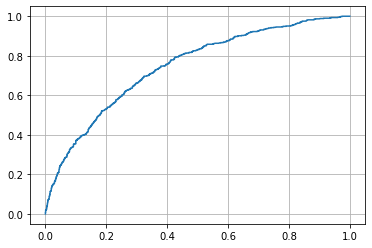

In [21]:
plt.plot(fpr, tpr)
plt.grid()

In [22]:
# рассчитаем roc_auc_score (площадь под ROC-кривой) штатными средствами
from sklearn.metrics import roc_auc_score

In [23]:
roc_auc_score(Y_test, predictions[:, 1])

0.7451629176618145

In [24]:
# Для того, чтобы вручную построить график ROC AUC и сравнить со штатным,
# посчитаем метрики в цикле для разных значений порога (threshold):

tpr_list = [] # для хранения tpr
fpr_list = [] # для хранения  fpr
precision_list = [] # для хранения precision
recall_list = [] # для хранения recall

for threshold in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    tpr_ = 0
    fpr_ = 0
   
    
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
        if predicted_prob > threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    if tp!=0 and fn!=0: 
        tpr_ = tp / (tp + fn)
        
    if fp!=0 and tn!=0:    
        fpr_ = fp / (fp + tn)
        
        tpr_list.append(tpr_)
        fpr_list.append(fpr_)

#   Precision − доля правильно предсказанных среди причисленных моделью к категории 1
    if tp!=0 and fp!=0:
        precision_ = tp / (tp + fp)
        
#   Recall − доля правильно предсказанных среди категории 1 (синоним: tpr, sensitivity)
    if tp!=0 and fn!=0:
        recall_ = tp / (tp + fn)
        
        precision_list.append(precision_)
        recall_list.append(recall_) 

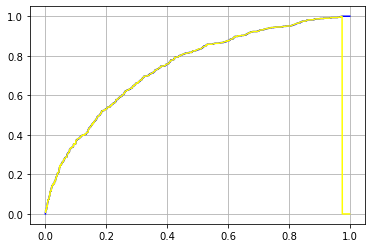

In [25]:
# Построим графики ROC AUC для расчета штатными средствами и для расчета вручную
plt.plot(fpr, tpr, color='blue')
plt.plot(fpr_list, tpr_list, color='yellow')
plt.grid()
plt.show()

# Вывод: графики, построенные на расчете штатными средствами (blue) и на расчете вручную (yellow), полностью совпадают,
# за исключением значений, близких к fpr=1.0; tpr=0.0 (из-за введенных ограничений для предотвращения деления на ноль)

In [26]:
# Построим теперь графики precision_recall на расчете штатными средствами и на расчете вручную
from sklearn.metrics import precision_recall_curve

precision, recall, thres = precision_recall_curve(Y_test, predictions[:, 1])

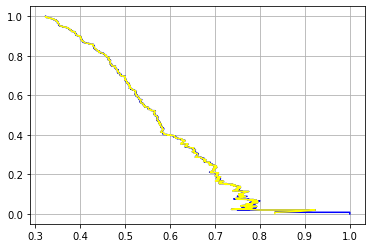

In [27]:
plt.plot(precision, recall, color='blue')
plt.plot(precision_list, recall_list, color='yellow')
plt.grid()
plt.show()

# Вывод: графики precision_recall, построенные на расчете штатными средствами (blue) и на расчете вручную (yellow), 
# полностью совпадают, за исключением значений при precision > 0.75